In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import getdist
from getdist import loadMCSamples, plots
import warnings
from copy import deepcopy

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# GENERAL PLOT OPTIONS
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['ytick.major.size'] = 6
matplotlib.rcParams['ytick.major.width'] = 1.2
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.8
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['legend.title_fontsize'] = 18
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.dpi'] = 300

from scipy.interpolate import interp1d
from scipy.integrate import quad

In [2]:

choice = 0
filepaths = [
    './data/roman_lcdm_baseline_mcmc/',
    './data/roman_lcdm_limber_mcmc/',
    './data/roman_lcdm_noRSD_mcmc/',
    './data/roman_lcdm_takahashi_mcmc/',
    './data/roman_lcdm_hmcode20_mcmc/',
    './data/roman_lcdm_takahashi_noRSD_limber_mcmc/'
    ]
labels = ['baseline \n(nonlimber+RSD+EE2)',
          'limber',
          'noRSD',
          'takahashi',
          'hmcode',
          'limber_noRSD_takahashi']
cmap = plt.get_cmap("viridis")
colors = [tuple(cmap(x)) for x in np.linspace(0, 1, len(labels))]
def load(filepath, settings):
    samples = loadMCSamples(filepath, settings=settings)
    #samples.thin(50)
    
    #indxs = samples.random_single_samples_indices(max_samples=20000, random_state=0)
    #loglikes = None if samples.loglikes is None else samples.loglikes[indxs]
    #samples.setSamples(samples.samples[indxs], weights=None, loglikes=loglikes)
    
    p = samples.getParams()
    s8 = p.sigma8*(p.omegam/0.3)**0.5
    try:
        samples.addDerived(
            s8,
            'S8',
            label = r'S_8',
        )
    except:
        True
    return samples
settings = {'ignore_rows':0.2, 'contours': [0.68, 0.95]}
samples = []
for i in range(len(labels)):
    samples.append(load(filepaths[i], settings = settings))
    # clear wrong latex
    pn = samples[-1].getParamNames()
    latex_As = r'10^{9} A_{\rm s}'
    for p in pn.names:
        if p.name == 'mnu':
            p.label = r'm_{\nu}'
        if p.name.lower() == 'omegan':
            p.label = r'\Omega_{\nu}'
        if p.name == 'As_1e9':
            p.label = latex_As
fiducials ={
    'As_1e9': 2.1,
    'ns': 0.96605,
    'H0': 67.32,
    'omegab': 0.0495,
    'omegam': 0.316,
    'sigma8': 0.81164266,
    'mnu': 0.06,
    'w': -1.0,
    'roman_DZ_S1': 0.0,
    'roman_DZ_S2': 0.0,
    'roman_DZ_S3': 0.0,
    'roman_DZ_S4': 0.0,
    'roman_DZ_S5': 0.0,
    'roman_DZ_S6': 0.0,
    'roman_DZ_S7': 0.0,
    'roman_DZ_S8': 0.0,
    
    'roman_DZ_L1': 0.0,
    'roman_DZ_L2': 0.0,
    'roman_DZ_L3': 0.0,
    'roman_DZ_L4': 0.0,
    'roman_DZ_L5': 0.0,
    'roman_DZ_L6': 0.0,
    'roman_DZ_L7': 0.0,
    'roman_DZ_L8': 0.0,
    'roman_DZ_L9': 0.0,
    'roman_DZ_L10': 0.0,
    
    'roman_M1': 0.0,
    'roman_M2': 0.0,
    'roman_M3': 0.0,
    'roman_M4': 0.0,
    'roman_M5': 0.0,
    'roman_M6': 0.0,
    'roman_M7': 0.0,
    'roman_M8': 0.0,
    
    'roman_A1_1': 0.5,
    'roman_A1_2': 0.0,
    'roman_A2_1': 0.0,
    'roman_A2_2': 0.0,
    'roman_BTA_1': 0.0,
    
    'roman_B1_1': 1.09,
    'roman_B1_2': 1.15,
    'roman_B1_3': 1.21,
    'roman_B1_4': 1.27,
    'roman_B1_5': 1.33,
    'roman_B1_6': 1.40,
    'roman_B1_7': 1.46,
    'roman_B1_8': 1.53,
    'roman_B1_9': 1.60,
    'roman_B1_10': 1.67,
}


fiducials['S8'] = fiducials['sigma8']*(fiducials['omegam']/0.3)**0.5


/scratch/local/jobs/44977436/ipykernel_2641658/1456842229.py:92: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for sub in obj.collections:


changed 2D contour collections: 4
changed 2D margin lines: 4


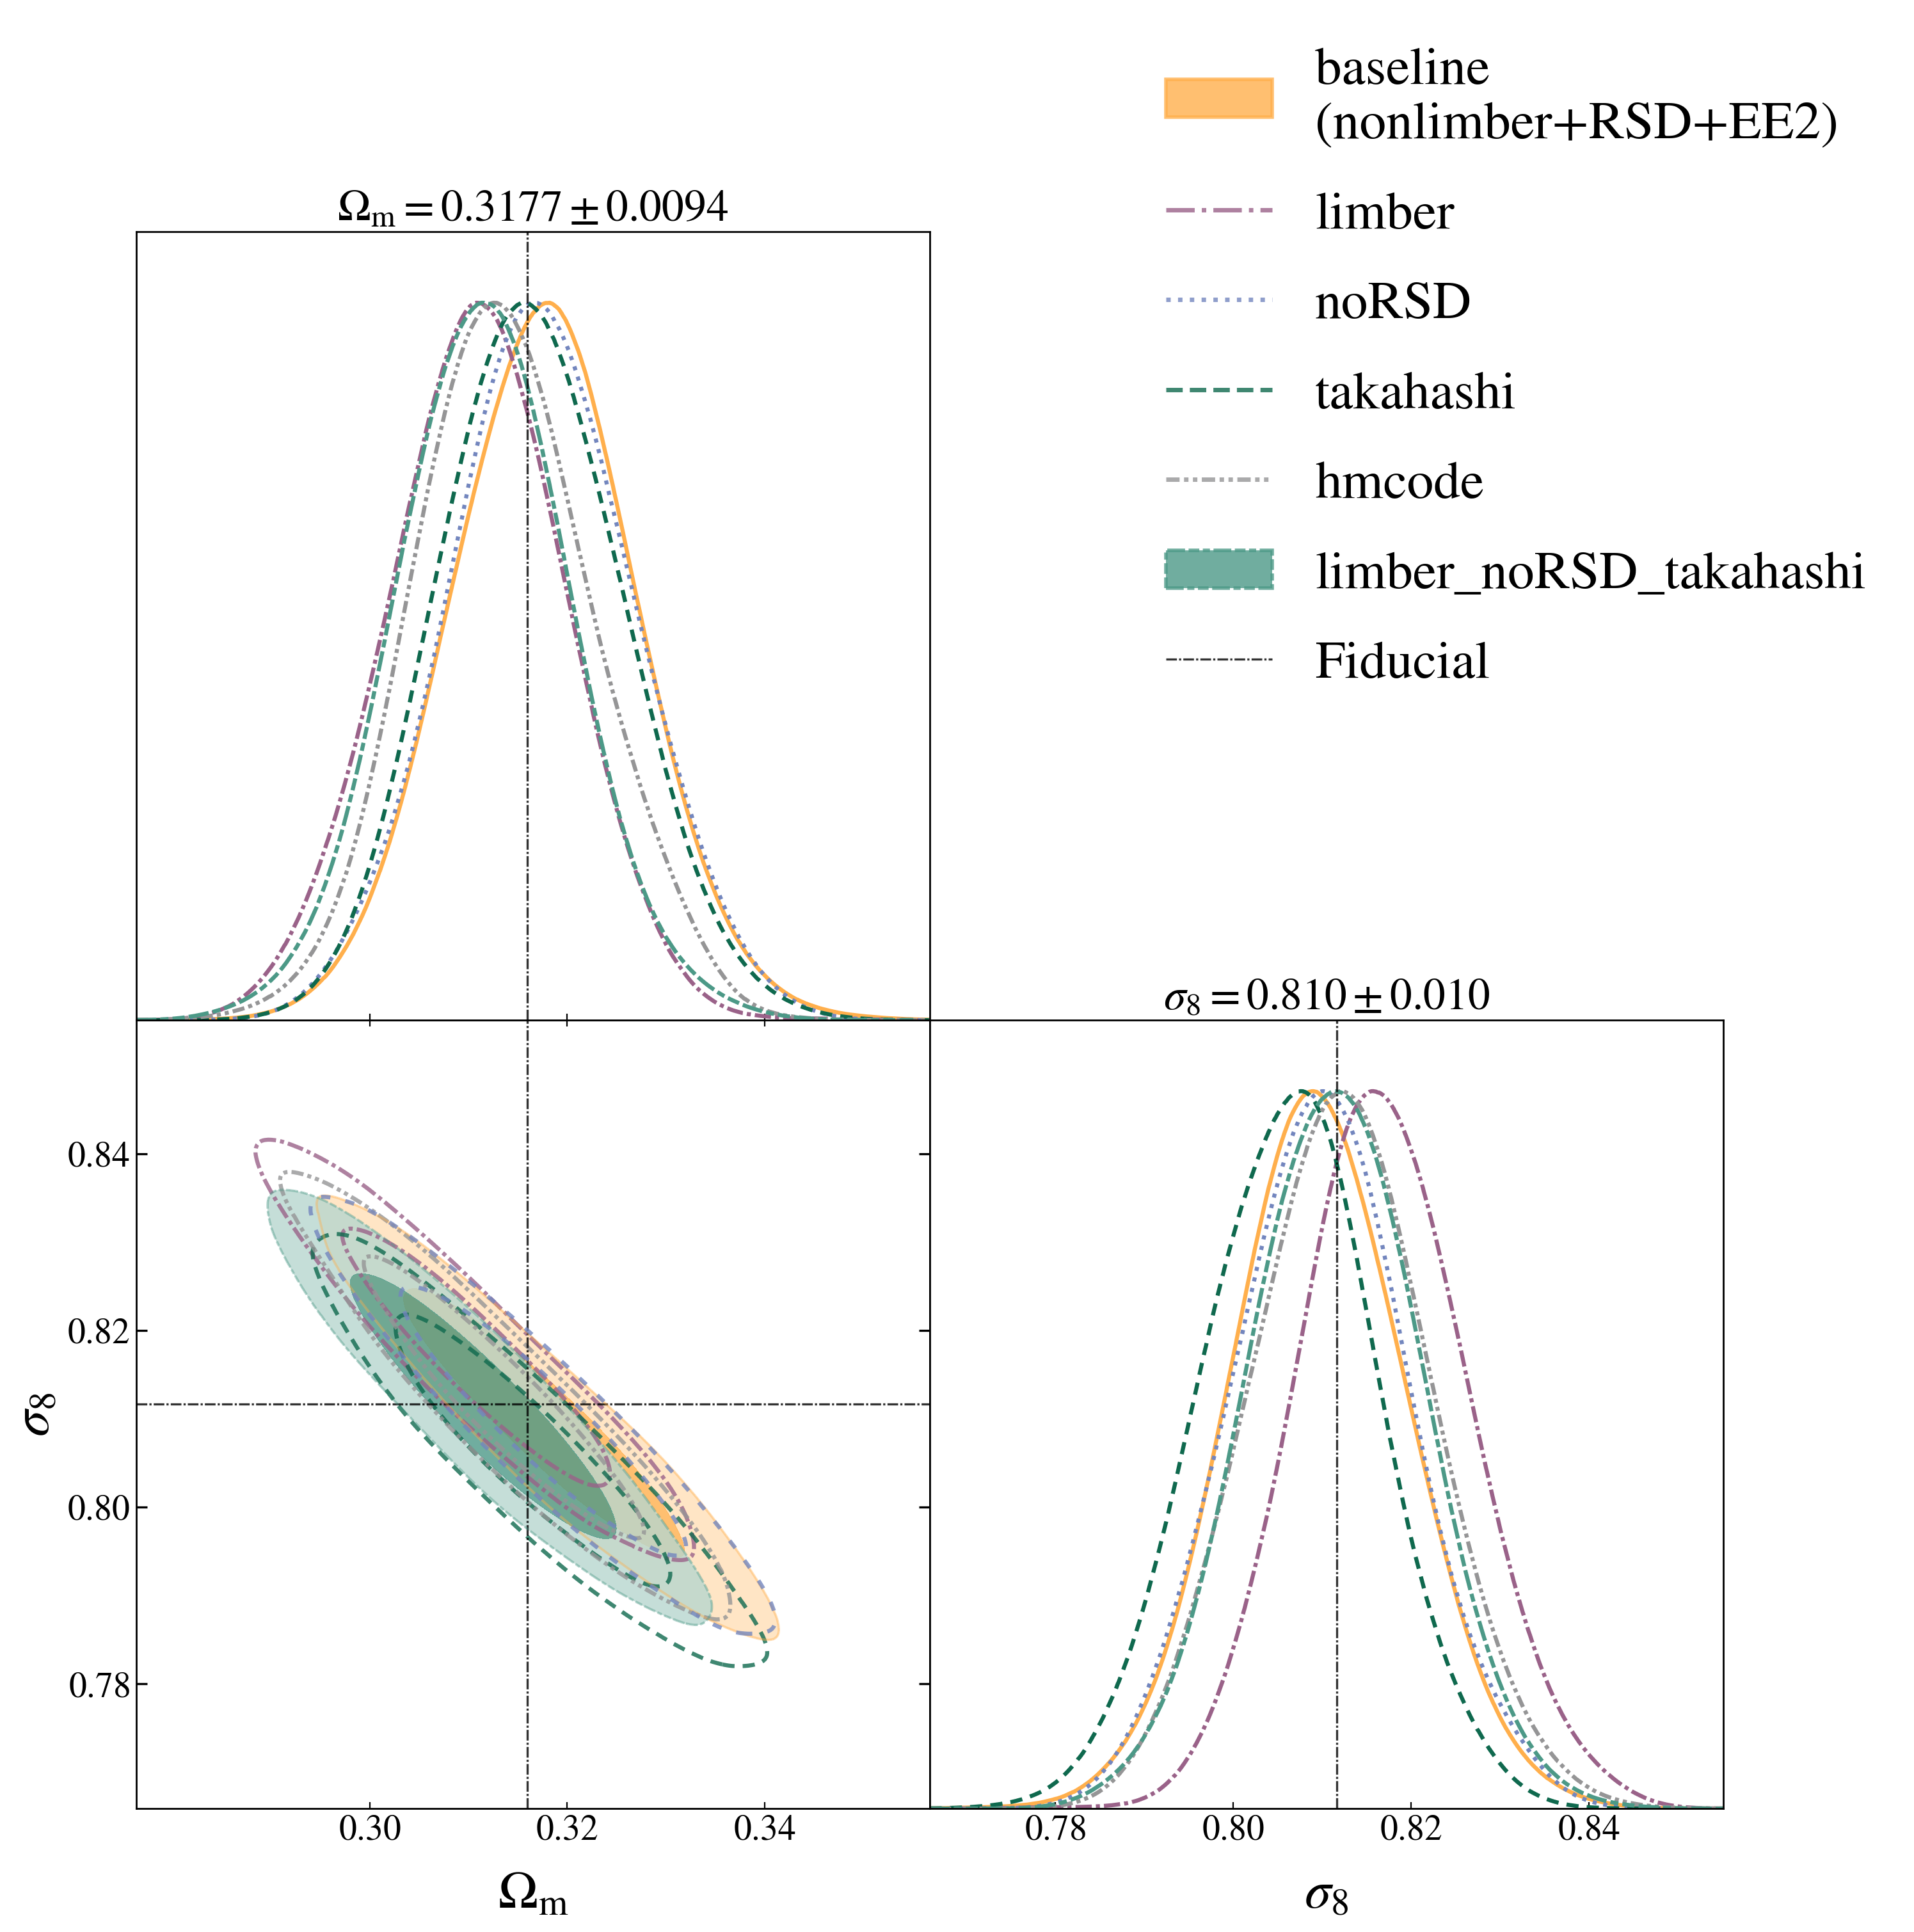

In [10]:
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from getdist import plots

g = plots.get_subplot_plotter(subplot_size=8)
g.settings.title_limit = 1
g.settings.title_limit_labels = True
g.settings.title_limit_fontsize = 25
g.settings.lab_fontsize = 24
g.settings.legend_fontsize = 30
g.settings.figure_legend_frame = False
g.settings.axes_fontsize = 20
g.settings.axes_labelsize = 30
g.settings.axis_tick_max_labels = 4

#params = ['As_1e9','ns','H0','omegab','omegam','sigma8']
params = ['omegam', 'sigma8']
if 'neutrino' in labels[choice]:
    params.append('mnu')
if 'wcdm' in labels[choice]:
    params.append('w')
cosmo_fid = {p: fiducials[p] for p in params}

g.triangle_plot(
    samples, params=params, filled=True,
    markers=cosmo_fid,
    marker_args={'ls':(0, (5,1,1,1)),'lw':1.2,'color':'k','alpha':0.8},
    legend_labels= labels,
    legend_loc='upper center',
    contour_colors=['#FFAF4C', '#9A6289', '#7386BE','#0F694E', '#959596', '#4C9987'],
    contour_ls = ['-','-.',':','--', '--', '--' ], 
    contour_args=[{'alpha':0.8}, {'alpha':0.8, 'filled':False}, {'alpha':0.8, 'filled':False}, {'alpha':0.8, 'filled':False}, {'alpha':0.8, 'filled':False}, {'alpha':0.8,}],
)

colors = ['#FFAF4C', '#9A6289', '#7386BE', '#0F694E', '#959596', '#4C9987']
linestyles = ['-', '-.', ':', '--', (0, (3,1,1,1,1,1)), (0, (5, 1, 2, 1, 3, 1))]
alphas = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
filled_flags = [True, False, False, False, False, True]

dataset_handles = []
for lab, c, ls, a, is_filled in zip(labels, colors, linestyles, alphas, filled_flags):
    if is_filled:
        h = Patch(facecolor=c, edgecolor=c, linestyle=ls, linewidth=2.0, alpha=a, label=lab)
    else:
        h = Line2D([0], [0], color=c, linestyle=ls, linewidth=2.5, alpha=a, label=lab)
    dataset_handles.append(h)
    
fid_handle = Line2D([0], [0], ls=(0, (5,1,1,1)), lw=1.2, color='k', alpha=0.8, label='Fiducial')

if g.legend is not None:
    g.legend.remove()

g.legend = g.fig.legend(
    handles=dataset_handles + [fid_handle],
    loc='upper right',
    frameon=False,
    fontsize=g.settings.legend_fontsize,
    ncol=1,
)

#fix the line
dash_map = {
    '#959596': (0, (3, 1, 1, 1, 1, 1)),
    '#4C9987': (0, (5, 1, 2, 1, 3, 1)),
}
targets = {matplotlib.colors.to_rgb(k): v for k, v in dash_map.items()}
def rgb_close(a, b, tol=3e-3):
    return all(abs(a[i]-b[i]) < tol for i in range(3))

def get_rgb_from_artist(a):
    # contour 线通常在 edgecolor；填充在 facecolor
    for getter in ("get_edgecolor", "get_facecolor"):
        if hasattr(a, getter):
            c = getattr(a, getter)()
            if c is not None and len(np.atleast_2d(c)):
                return tuple(np.atleast_2d(c)[0][:3])
    return None

def set_dash_line2d(ln, dash):
    if isinstance(dash, tuple) and len(dash) == 2:
        ln.set_linestyle(dash)
    else:
        ln.set_dashes(list(dash))

from matplotlib.contour import QuadContourSet
changed = 0
for ax in g.fig.axes:
    for obj in ax.collections:
        if isinstance(obj, QuadContourSet):
            # 真正的线/面在 obj.collections 里
            for sub in obj.collections:
                rgb = get_rgb_from_artist(sub)
                if rgb is None:
                    continue
                for trgb, dash in targets.items():
                    if rgb_close(rgb, trgb):
                        # 关键：对 Collection 用 [dash]，避免被当成可迭代 linestyles 拆开
                        sub.set_linestyle([dash])
                        changed += 1
print("changed 2D contour collections:", changed)

n_changed = 0
for ax in g.fig.axes:
    for ln in ax.lines:
        rgb = matplotlib.colors.to_rgb(ln.get_color())
        for target_rgb, dash in targets.items():
            if rgb_close(rgb, target_rgb):
                set_dash_line2d(ln, dash)
                n_changed += 1
print("changed 2D margin lines:", changed)
plt.show()

g.export(f'pic/approximation_contour.png', dpi=300)


In [14]:
from collections import Counter

for i, ax in enumerate(g.fig.axes):
    types_col = Counter(type(c).__name__ for c in ax.collections)
    types_lin = Counter(type(l).__name__ for l in ax.lines)
    print(f"\nAX {i}:")
    print("  collections:", dict(types_col))
    print("  lines      :", dict(types_lin))


AX 0:
  collections: {'QuadContourSet': 8, 'PathCollection': 6}
  lines      : {'Line2D': 2}

AX 1:
  collections: {}
  lines      : {'Line2D': 7}

AX 2:
  collections: {}
  lines      : {'Line2D': 7}
